In [33]:
import os
import gdal
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import l2
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import metrics

In [34]:
os.chdir('C:/Users/baps/Desktop/urvil') 
filename = 'final_data1.csv'
dataset = pd.read_csv(filename)
print(list(dataset))
print("class : 0 is emptyland   " + "class : 1 is urban   " + "class : 2 is vegetation   " + "class : 3 is waterbody  ")
dict_of_class = {0:'emptyland',1:'urban',2:'vegetation',3:'waterbody'} 

['Unnamed: 0', 'Unnamed: 0.1', 'lat', 'lon', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'class']
class : 0 is emptyland   class : 1 is urban   class : 2 is vegetation   class : 3 is waterbody  


In [35]:
Class_ID = dataset[['class']]
X = dataset[['B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12']]
Y = np.ravel(Class_ID)
X = X.to_numpy()
print(X.shape)
print(Y.shape)

(1551, 10)
(1551,)


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
#print(X_train[0])

(1240, 10)
(311, 10)
(1240,)
(311,)


In [37]:
min_max_scaler = preprocessing.MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)
#print(X_train[0])
#print(X_test[0])

In [38]:
input_num_units = 10
hidden1_num_units = 100
hidden2_num_units = 100
hidden3_num_units = 100
hidden4_num_units = 100
hidden5_num_units = 100
output_num_units = 4

In [39]:
model = Sequential([
    Dense(output_dim=hidden1_num_units, input_dim=input_num_units, kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units,  kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units,  kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units,  kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

C:\Users\baps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, kernel_regularizer=<keras.reg..., activation="relu", units=100)`
  
C:\Users\baps\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, kernel_regularizer=<keras.reg..., activation="relu", units=100)`
  after removing the cwd from sys.path.
C:\Users\baps\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, kernel_regularizer=<keras.reg..., activation="relu", units=100)`
  
C:\Users\baps\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, kernel_regularizer=<keras.reg..., activation="relu", units=100)`
  
C:\Users\baps\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` cal

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 100)               1100      
_________________________________________________________________
dropout_24 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_25 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_26 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 100)               10100     
__________

In [41]:
sgd = keras.optimizers.Adam(lr=0.001, beta_1=0.93, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)

In [42]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [43]:
history=model.fit(X_train, 
          Y_train,
          epochs=300, 
          batch_size=128, 
          validation_split = 0.1,
          verbose=1,
          )

Train on 1116 samples, validate on 124 samples
Epoch 1/300
1116/1116 [==============================] - 1s 1ms/step - loss: 1.3933 - acc: 0.3396 - val_loss: 1.3751 - val_acc: 0.4194
Epoch 2/300
1116/1116 [==============================] - 0s 61us/step - loss: 1.3708 - acc: 0.3244 - val_loss: 1.3512 - val_acc: 0.4274
Epoch 3/300
1116/1116 [==============================] - 0s 61us/step - loss: 1.3472 - acc: 0.3647 - val_loss: 1.3284 - val_acc: 0.4274
Epoch 4/300
1116/1116 [==============================] - 0s 76us/step - loss: 1.3259 - acc: 0.3746 - val_loss: 1.3073 - val_acc: 0.4274
Epoch 5/300
1116/1116 [==============================] - 0s 80us/step - loss: 1.3083 - acc: 0.3566 - val_loss: 1.2879 - val_acc: 0.4274
Epoch 6/300
1116/1116 [==============================] - 0s 90us/step - loss: 1.2904 - acc: 0.3799 - val_loss: 1.2701 - val_acc: 0.4274
Epoch 7/300
1116/1116 [==============================] - 0s 80us/step - loss: 1.2696 - acc: 0.3808 - val_loss: 1.2530 - val_acc: 0.4113
Ep

1116/1116 [==============================] - 0s 78us/step - loss: 0.8437 - acc: 0.7401 - val_loss: 0.7839 - val_acc: 0.8226
Epoch 61/300
1116/1116 [==============================] - 0s 97us/step - loss: 0.8194 - acc: 0.7661 - val_loss: 0.7631 - val_acc: 0.8306
Epoch 62/300
1116/1116 [==============================] - 0s 72us/step - loss: 0.8055 - acc: 0.7625 - val_loss: 0.7466 - val_acc: 0.8306
Epoch 63/300
1116/1116 [==============================] - 0s 77us/step - loss: 0.7910 - acc: 0.7706 - val_loss: 0.7315 - val_acc: 0.8306
Epoch 64/300
1116/1116 [==============================] - 0s 73us/step - loss: 0.7780 - acc: 0.7957 - val_loss: 0.7154 - val_acc: 0.8226
Epoch 65/300
1116/1116 [==============================] - 0s 64us/step - loss: 0.7508 - acc: 0.8047 - val_loss: 0.6959 - val_acc: 0.8226
Epoch 66/300
1116/1116 [==============================] - 0s 63us/step - loss: 0.7293 - acc: 0.8082 - val_loss: 0.6769 - val_acc: 0.8306
Epoch 67/300
1116/1116 [==============================

Epoch 120/300
1116/1116 [==============================] - 0s 87us/step - loss: 0.3502 - acc: 0.8916 - val_loss: 0.3012 - val_acc: 0.9194
Epoch 121/300
1116/1116 [==============================] - 0s 81us/step - loss: 0.3280 - acc: 0.8961 - val_loss: 0.3025 - val_acc: 0.8952
Epoch 122/300
1116/1116 [==============================] - 0s 71us/step - loss: 0.3416 - acc: 0.9005 - val_loss: 0.3013 - val_acc: 0.9113
Epoch 123/300
1116/1116 [==============================] - 0s 70us/step - loss: 0.3339 - acc: 0.9032 - val_loss: 0.2955 - val_acc: 0.9194
Epoch 124/300
1116/1116 [==============================] - 0s 64us/step - loss: 0.3416 - acc: 0.8925 - val_loss: 0.2936 - val_acc: 0.9113
Epoch 125/300
1116/1116 [==============================] - 0s 64us/step - loss: 0.3294 - acc: 0.8970 - val_loss: 0.2918 - val_acc: 0.9113
Epoch 126/300
1116/1116 [==============================] - 0s 65us/step - loss: 0.3251 - acc: 0.8961 - val_loss: 0.2936 - val_acc: 0.9113
Epoch 127/300
1116/1116 [=========

1116/1116 [==============================] - 0s 67us/step - loss: 0.2816 - acc: 0.9167 - val_loss: 0.2446 - val_acc: 0.9274
Epoch 180/300
1116/1116 [==============================] - 0s 84us/step - loss: 0.3017 - acc: 0.9050 - val_loss: 0.2375 - val_acc: 0.9435
Epoch 181/300
1116/1116 [==============================] - 0s 63us/step - loss: 0.2706 - acc: 0.9185 - val_loss: 0.2375 - val_acc: 0.9516
Epoch 182/300
1116/1116 [==============================] - 0s 63us/step - loss: 0.2854 - acc: 0.9131 - val_loss: 0.2426 - val_acc: 0.9355
Epoch 183/300
1116/1116 [==============================] - 0s 60us/step - loss: 0.2854 - acc: 0.9104 - val_loss: 0.2390 - val_acc: 0.9516
Epoch 184/300
1116/1116 [==============================] - 0s 61us/step - loss: 0.2971 - acc: 0.9032 - val_loss: 0.2371 - val_acc: 0.9435
Epoch 185/300
1116/1116 [==============================] - 0s 63us/step - loss: 0.2748 - acc: 0.9176 - val_loss: 0.2403 - val_acc: 0.9274
Epoch 186/300
1116/1116 [=======================

1116/1116 [==============================] - 0s 65us/step - loss: 0.2532 - acc: 0.9319 - val_loss: 0.2191 - val_acc: 0.9435
Epoch 239/300
1116/1116 [==============================] - 0s 64us/step - loss: 0.2564 - acc: 0.9211 - val_loss: 0.2241 - val_acc: 0.9355
Epoch 240/300
1116/1116 [==============================] - 0s 62us/step - loss: 0.2542 - acc: 0.9310 - val_loss: 0.2129 - val_acc: 0.9435
Epoch 241/300
1116/1116 [==============================] - 0s 61us/step - loss: 0.2463 - acc: 0.9292 - val_loss: 0.2240 - val_acc: 0.9355
Epoch 242/300
1116/1116 [==============================] - 0s 64us/step - loss: 0.2579 - acc: 0.9256 - val_loss: 0.2248 - val_acc: 0.9355
Epoch 243/300
1116/1116 [==============================] - 0s 65us/step - loss: 0.2548 - acc: 0.9194 - val_loss: 0.2092 - val_acc: 0.9435
Epoch 244/300
1116/1116 [==============================] - 0s 64us/step - loss: 0.2542 - acc: 0.9238 - val_loss: 0.2098 - val_acc: 0.9435
Epoch 245/300
1116/1116 [=======================

1116/1116 [==============================] - 0s 84us/step - loss: 0.2337 - acc: 0.9418 - val_loss: 0.1918 - val_acc: 0.9435
Epoch 298/300
1116/1116 [==============================] - 0s 71us/step - loss: 0.2386 - acc: 0.9211 - val_loss: 0.2017 - val_acc: 0.9516
Epoch 299/300
1116/1116 [==============================] - 0s 65us/step - loss: 0.2298 - acc: 0.9310 - val_loss: 0.2092 - val_acc: 0.9516
Epoch 300/300
1116/1116 [==============================] - 0s 61us/step - loss: 0.2403 - acc: 0.9301 - val_loss: 0.1964 - val_acc: 0.9435


In [44]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


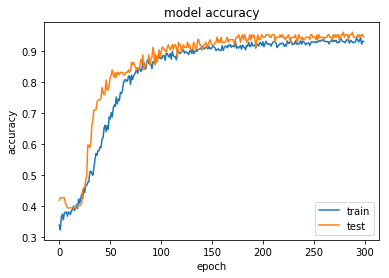

In [45]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

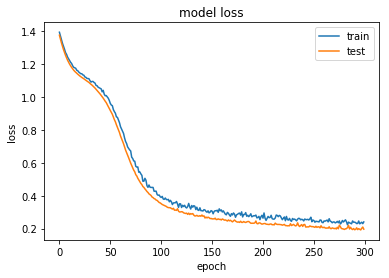

In [46]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [47]:
Y_pred = model.predict(X_test)
print(X_test.shape)
print(Y_pred.shape)
score = model.evaluate(X_test, Y_test,batch_size=100, verbose=1)
print(score)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

(311, 10)
(311, 4)
311/311 [==============================] - 0s 26us/step
[0.43625661721183556, 0.8617363491625648]
Baseline Error: 13.83%


In [48]:
test_class = model.predict_classes(X_test)

In [49]:
## Confusion matrix
print("Confussion matrix:\n%s" %
      metrics.confusion_matrix(Y_test, test_class))

Confussion matrix:
[[101   0  11]
 [ 28  77   1]
 [  2   1  90]]


In [50]:

# Precission and accuracy:
print("Classification report:\n%s" %
      metrics.classification_report(Y_test, test_class))
print("Classification accuracy: %f" %
      metrics.accuracy_score(Y_test, test_class))

Classification report:
              precision    recall  f1-score   support

           1       0.77      0.90      0.83       112
           2       0.99      0.73      0.84       106
           3       0.88      0.97      0.92        93

   micro avg       0.86      0.86      0.86       311
   macro avg       0.88      0.87      0.86       311
weighted avg       0.88      0.86      0.86       311

Classification accuracy: 0.861736


In [51]:
import osr
import gdal 
ten_meter  = {2:"B2",3:"B3",4:"B4",8:"B8"}
twenty_meter = {5:"B5",6:"B6",7:"B7",9:"B8A",10:"B9",11:"B11",12:"B12"}
ds = gdal.Open("final_data_2.tif")
temp = ds.GetGeoTransform()
print(temp)
arr = {}
for no,col in ten_meter.items() :
    band = ds.GetRasterBand(no)
    arr1 = band.ReadAsArray()
    arr[no] = arr1 
for no,col in twenty_meter.items() :
    band = ds.GetRasterBand(no)
    arr1 = band.ReadAsArray()
    arr[no] = arr1 


(77.51050546955403, 8.983152841195215e-05, 0.0, 30.381202571979042, 0.0, -8.983152841195215e-05)


In [ ]:
#print(arr[2].shape)
#print(arr[3].shape)
colour_arr = np.zeros((3,arr[2].shape[0],arr[2].shape[1]),dtype='float64')
print(colour_arr.shape)
#print(colour_arr)
temp_arr = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],dtype='float64')
count_arr = np.array([0,0,0,0,0,0,0,0,0,0])
temp_arr = temp_arr.reshape(1,10)
print(temp_arr.shape)
dict_colour = {0:(139,69,19),1:(128,128,128),2:(0,128,0),3:(0,0,255)}
for i in range(arr[2].shape[0]) :
    for j in range(arr[2].shape[1]) :
        temp_arr[0][0] = arr[2][i][j]
        temp_arr[0][1] = arr[3][i][j]
        temp_arr[0][2] = arr[4][i][j]
        temp_arr[0][3] = arr[5][i][j]
    colour_value = model.predict_classes(temp_arr)
    count_arr[colour_value] += 1 
    rgb_val = dict_colour[colour_value[0]]
    colour_arr[0][i][j] = rgb_val[0]
    colour_arr[1][i][j] = rgb_val[1]
    colour_arr[2][i][j] = rgb_val[2]

In [ ]:
print(colour_arr.shape)
#print(colour_arr)
print(count_arr)
#print(np.min(colour_arr[0]))
#print(np.max(colour_arr[0]))

In [ ]:

driver = gdal.GetDriverByName('GTiff')
ds1 = driver.Create('final_marking.tif',colour_arr.shape[2],colour_arr.shape[1],3, gdal.GDT_Float32)
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)  
ds1.SetProjection(srs.ExportToWkt())
ds1.SetGeoTransform(ds.GetGeoTransform())

for i in range(1,4) :
    temp_ar=colour_arr[i-1,:,:]
    outband=ds1.GetRasterBand(i)
    outband.SetStatistics(np.min(temp_ar), np.max(temp_ar), np.average(temp_ar),np.std(temp_ar))
    outband.WriteArray(temp_ar)
    outband.FlushCache()

outband =None 
band = None
ds1 = None
ds=None